In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 46 kB/s 


In [ ]:
import rasterio 
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
import os
import copy
%matplotlib inline

In [ ]:
band3 = rasterio.open("/content/drive/MyDrive/ColabNotebooks/LC08_L2SP_142049_20210608_20210615_02_T1_SR_B3.TIF")
band5 = rasterio.open("/content/drive/MyDrive/ColabNotebooks/LC08_L2SP_142049_20210608_20210615_02_T1_SR_B5.TIF")
band6 = rasterio.open("/content/drive/MyDrive/ColabNotebooks/LC08_L2SP_142049_20210608_20210615_02_T1_SR_B6.TIF")
band7 = rasterio.open("/content/drive/MyDrive/ColabNotebooks/LC08_L2SP_142049_20210608_20210615_02_T1_SR_B7.TIF")

In [ ]:
green = band3.read(1).astype("float64")
nir = band5.read(1).astype("float64")
swir1 = band6.read(1).astype("float64")
swir2 = band7.read(1).astype("float64")

In [ ]:
ndwi = np.where(
    (green+nir) == 0.,
    0,
    (green-nir)/(green+nir)
)

ndwisw1 = np.where(
    (green+swir1) == 0.,
    0,
    (green-swir1)/(green+swir1)
)

ndwisw2 = np.where(
    (green+swir2) == 0.,
    0,
    (green-swir2)/(green+swir2)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [ ]:
ndwi_copy = copy.copy(ndwi)
ndwi_copy[ndwi>0] = np.nan

ndwisw1_copy = copy.copy(ndwisw1)
ndwisw1_copy[ndwisw1>0] = np.nan

ndwisw2_copy = copy.copy(ndwisw2)
ndwisw2_copy[ndwisw2>0] = np.nan

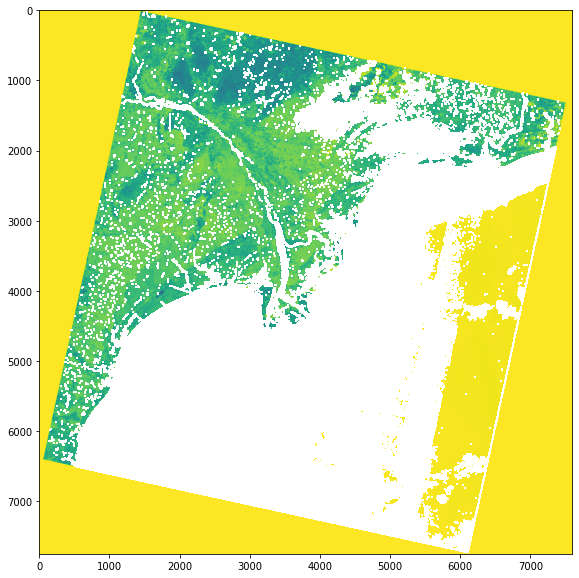

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ndwi_copy)

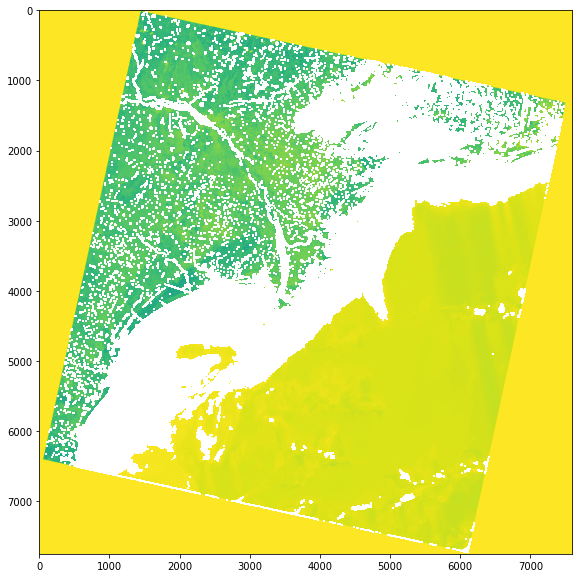

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ndwisw1_copy)

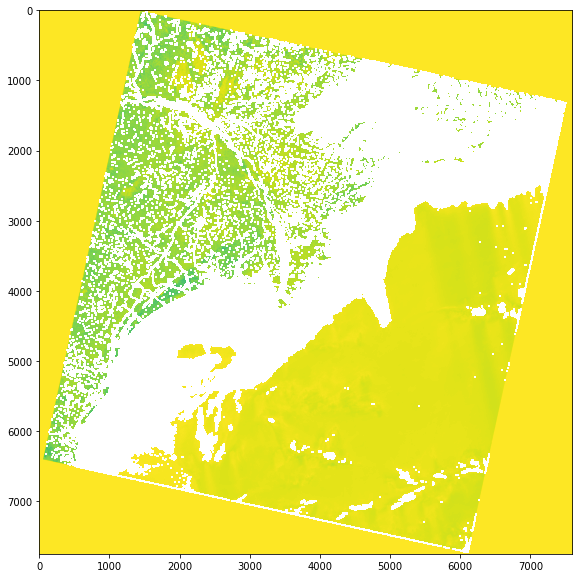

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ndwisw2_copy)

In [29]:
Area = 234
PixelAreaIR = (Area*(np.isnan(ndwi_copy).sum()/(ndwi_copy.shape[0]*ndwi_copy.shape[1]))).round()
PixelAreaSWIR1 = (Area*(np.isnan(ndwisw1_copy).sum()/(ndwisw1_copy.shape[0]*ndwisw1_copy.shape[1]))).round()
PixelAreaSWIR2 = (Area*(np.isnan(ndwisw2_copy).sum()/(ndwisw2_copy.shape[0]*ndwisw2_copy.shape[1]))).round()

print(PixelAreaIR, "KM")
print(PixelAreaSWIR1, "KM")
print(PixelAreaSWIR2, "KM")

43.0 KM
30.0 KM
37.0 KM


In [ ]:
ndwiImage = rasterio.open('/content/ndwiImage.tiff','w',driver='Gtiff',
                          width=band3.width, 
                          height = band3.height, 
                          count=1, crs=band3.crs, 
                          transform=band3.transform, 
                          dtype='float64')
ndwiImage.write(ndwi, 1)
ndwiImage.close()

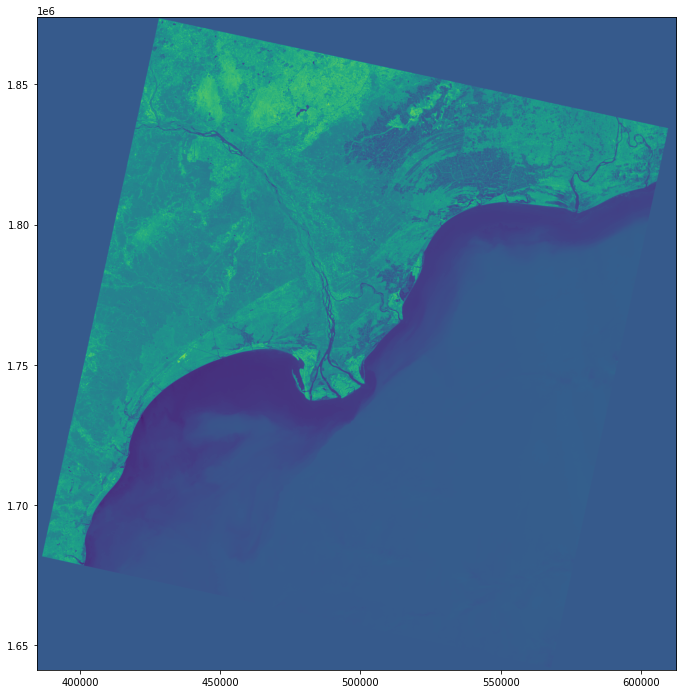

In [ ]:
ndwi = rasterio.open('/content/ndwiImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndwi)